In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# kinetic parameters with assumed units:
aM = 15.1745   # 1/hr, transcription rate per nM of free DNA
aP = 1         # 1/hr, translation rate per nM of mRNA
aF = 1         # 1/hr, conversion rate from protein to repressor
bM = 1         # 1/hr, mRNA degradation rate
bP = 1         # 1/hr, protein degradation rate
bF = 1         # 1/hr, repressor degradation rate
kf = 200       # 1/(nM·hr), binding rate constant for free DNA and repressor
kb = 50        # 1/hr, unbinding rate constant for the DNA-repressor complex
DT = 164.75    # nM, total DNA concentration


In [ ]:
# Define the ODE system of the full model
def full_model(t, y):
    M, P, F, DR, DA = y

    # Calculate derivatives
    dMdt =aM*DA-bM*M
    dPdt=aP*M-bP*P
    dFdt=aF*P-bF*F+ kb*DR-kf*DA*F
    dDRdt = (kf * DA * F) - (kb*DR)-(bF*DR)
    dDAdt = (-kf * DA * F) + (kb * DR) + (bF*DR)
    # return derivates
    return [dMdt, dPdt, dFdt, dDRdt, dDAdt]


    # return

In [ ]:
# Initial condition
M0, P0, F0, DR0, DA0 = 0, 0, 0, 0, DT  # Start with all DNA in active form
y0 = [M0, P0, F0, DR0, DA0]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

In [ ]:
# Solve ODEs
solution = solve_ivp(full_model, t_span, y0, t_eval=t_eval)
# solution =

In [ ]:
print((np.sum(solution.y[3,-1])+np.sum(solution.y[4,-1])))

164.74999999999483


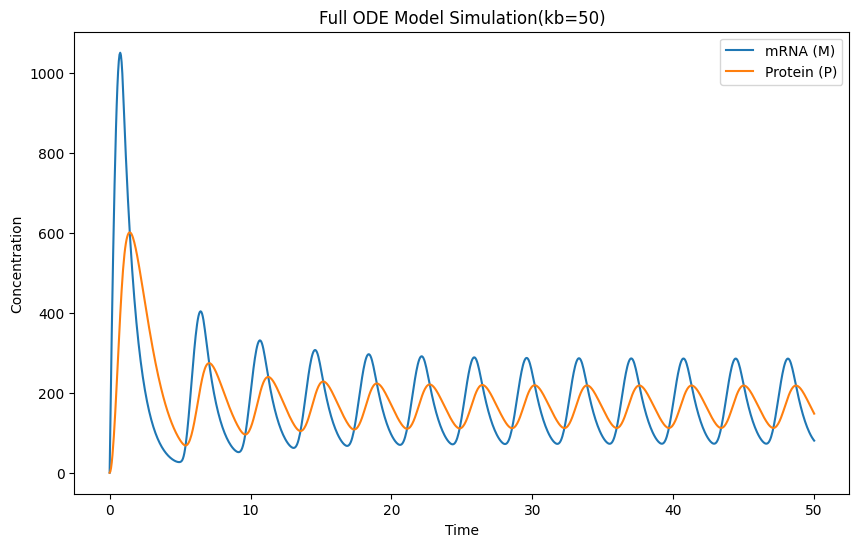

In [ ]:
# Plot results

plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label="mRNA (M)")
plt.plot(solution.t, solution.y[1], label="Protein (P)")

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Full ODE Model Simulation(kb=50)")
plt.show()